In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split


In [3]:
np.set_printoptions(linewidth=114)

In [ ]:
#split data into train and test set
train, test = train_test_split(df, test_size=0.20)

#save both train and test to their individial csv files
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)

### Preprocess: 

In [3]:
train_file = "../Dataset/train.csv"
train_df = pd.read_csv(train_file, header = 0)


In [19]:
train_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
class_name = ['class']
for index in range(1,785):
    class_name.append(index)

train_file = "../Dataset/train.csv"
train_df = pd.read_csv(train_file, header = None, names=class_name)


In [5]:
train_df.head()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [6]:
class_map = {}
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(len(alphabets)):
    class_map[i] = alphabets[i]
class_map

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [7]:
train_df['class'].map(class_map).unique()

array(['A', 'C', 'O', 'Y', 'Q', 'W', 'U', 'J', 'K', 'L', 'S', 'X', 'F',
       'P', 'N', 'Z', 'T', 'E', 'R', 'G', 'H', 'V', 'M', 'B', 'D', 'I'],
      dtype=object)

In [8]:
name = train_df['class'].value_counts().keys().map(class_map)

val = train_df['class'].value_counts()

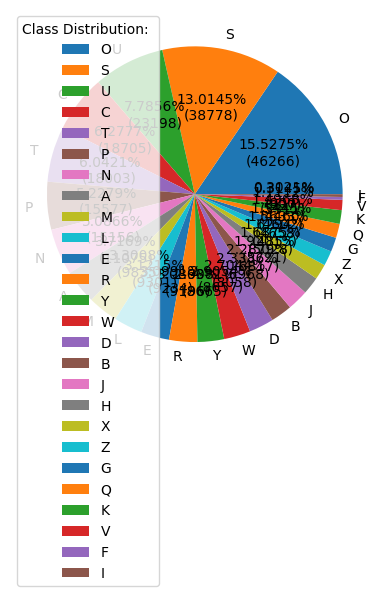

In [9]:
import matplotlib.pyplot as plt
import numpy as np

total = len(train_df.values)
def autopct_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

plt.pie(val, labels=name, autopct=autopct_fmt)
plt.legend(title = "Class Distribution: ")
plt.show()

Resource:
https://www.w3schools.com/python/matplotlib_pie_charts.asp


In [10]:
#check for missing values
def missing_val(data):
  nullVal = data.isnull().sum().sum()
  return nullVal
missing_val(train_df)

0

Number of O samples ended up being oversampled in this distribution of the training dataset, need to undersample this inorder to stray away from induced bias. 

Split data is shuffled and has a large variation with not equal distribution of classes for each captial letter alphabet in test and train datasets. A possible approach can be to use stratisfied shuffle for train test split to have even class distribution. 

Resource:
https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

In [11]:
#set train data
train_data = train_df.iloc[:,1:].values
#set train labels
train_label = train_df.iloc[:,0].values


In [29]:
train_df.iloc[:,0].value_counts().sort_index()

0     11075
1      6968
2     18705
3      8058
4      9234
5       937
6      4658
7      5721
8       900
9      6817
10     4460
11     9301
12     9835
13    15156
14    46266
15    15577
16     4602
17     9196
18    38778
19    18003
20    23198
21     3311
22     8657
23     5028
24     8665
25     4855
Name: class, dtype: int64

In [31]:
train_df.count(axis='columns')

0         785
1         785
2         785
3         785
4         785
         ... 
297956    785
297957    785
297958    785
297959    785
297960    785
Length: 297961, dtype: int64

In [12]:
test_file = "../Dataset/test.csv"
test_df = pd.read_csv(test_file, header = 0)

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 446.1 MB


In [13]:
#set test data
test_data = test_df.iloc[:,1:].values
#set test labels
test_label = test_df.iloc[:,0].values

Feed Data to KNN model

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data,train_label )

KNeighborsClassifier(n_neighbors=3)

In [48]:
prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

95.56047791649885


In [49]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_data,train_label )

prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

96.00886024969795


In [50]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_data,train_label )

prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

95.44234125385958


In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_data,train_label )

prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(train_data,train_label )

prediction = model.predict(test_data)
print(model.score(test_data, test_label)*100)

Comparing the score of n neighbors, n = 5 yields the best accuracy. Therefore, will proceed with n=5 for best result. 

In [58]:
#import for KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check accuracy
from sklearn import metrics


In [59]:
#Use different k neighbors values to see test accuracy for each
k_val = range(3,7)
k_val
scores = []

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_label)
    pred = knn.predict(test_data)
    scores.append(metrics.accuracy_score(test_label,pred))
print(scores)

[0.9556047791649885, 0.9560612162706403, 0.9600886024969795, 0.9568129950328903]


Text(0, 0.5, 'Test Accuracy Score')

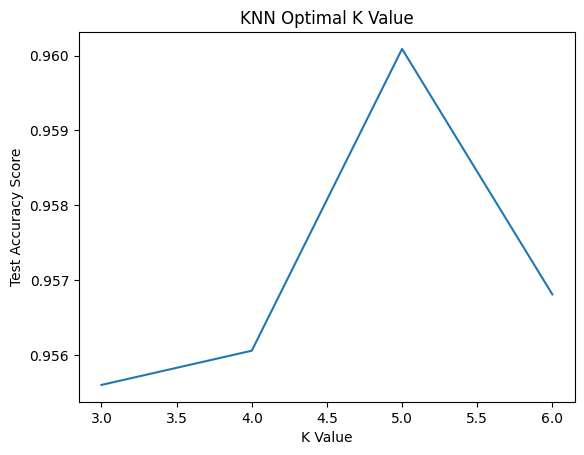

In [60]:
import matplotlib.pyplot as plt
import numpy as np
#plot value of K vs. Test Accuracy

plt.plot(k_val, scores)
plt.title('KNN Optimal K Value')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy Score')

The lower the k value, the more complex the model becomes. Training accuracy increases as model complexity increases. Testing accuracy decreases if the model is too complex or not complex enough. 

Confusion Matrix:

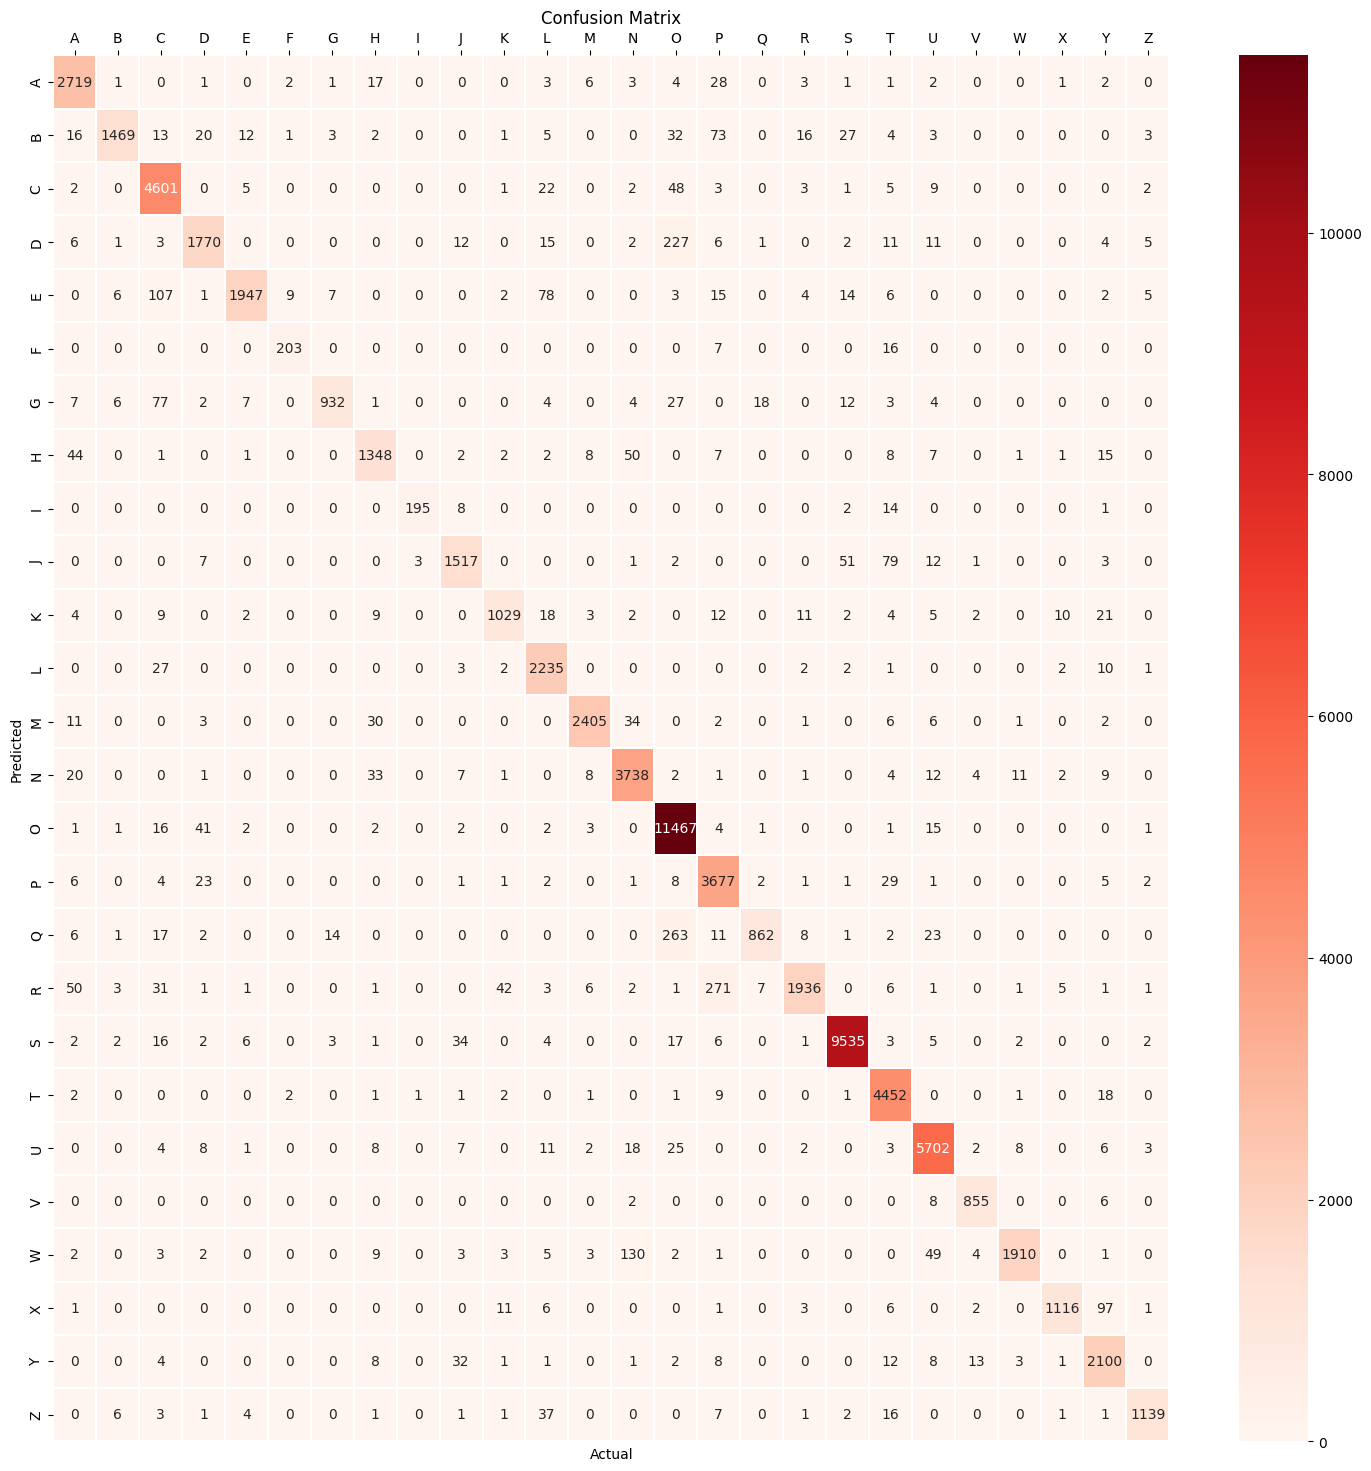

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import rcParams

cm= confusion_matrix(y_true=test_label, y_pred=prediction)
s = sns.heatmap(cm, xticklabels=alphabets,yticklabels=alphabets, annot=True,fmt='g', cmap='Reds', linewidth=0.10)
s.set(title='Confusion Matrix')
s.xaxis.tick_top()
s.set_xlabel('Actual')
s.set_ylabel('Predicted')

rcParams['figure.figsize']=18,18

The Confusion Matrix for the letters actual labels versus the predicted labels show us where most of the confusion occurs when predicting classes. Letter Q was confused as letter O a few times. Letter D was confused with letter O a few times as well. This could be the result of class distribution being uneven where oversampling for letter O in the dataset could cause confusion. 

Resource: https://hands-on.cloud/implementing-knn-algorithm-using-python/#h-confusion-matrix-for-binary-classification

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [97]:
from sklearn.metrics import classification_report

print(classification_report(test_label, prediction,target_names=alphabets))


              precision    recall  f1-score   support

           A       0.94      0.97      0.96      2795
           B       0.98      0.86      0.92      1700
           C       0.93      0.98      0.95      4704
           D       0.94      0.85      0.89      2076
           E       0.98      0.88      0.93      2206
           F       0.94      0.90      0.92       226
           G       0.97      0.84      0.90      1104
           H       0.92      0.90      0.91      1497
           I       0.98      0.89      0.93       220
           J       0.93      0.91      0.92      1676
           K       0.94      0.90      0.92      1143
           L       0.91      0.98      0.94      2285
           M       0.98      0.96      0.97      2501
           N       0.94      0.97      0.95      3854
           O       0.95      0.99      0.97     11559
           P       0.89      0.98      0.93      3764
           Q       0.97      0.71      0.82      1210
           R       0.97    